Algorithm Evaluation: Choosing the best model on basis of different performance metrics.

## Importing all the necessary libraries

In [2]:
# ignore non-harmful warnings
from warnings import filterwarnings
filterwarnings('ignore')

# To read the dataset
import pandas as pd

# To clean the data and preprocess it
# from sklearn.pipeline import make_pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler,OneHotEncoder
# from sklearn.compose import ColumnTransformer
from data_clean_preprocess import clean_process_data

# Divide the data into training and testing
from sklearn.model_selection import train_test_split,cross_val_score

# Model buidling=> Decision Tree, Logistic Regression, Random Forest, Gradient Boost, XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import f1_score,ConfusionMatrixDisplay,classification_report

## Read the dataset

In [3]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/train_loan.csv'
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
print('Shape of Data',df.shape)

Shape of Data (58645, 13)


In [5]:
print(f'Shape of Data:{df.shape}')
print(f'Columns present in dataset: {df.columns}')
print(f'Info of the dataset: {df.info()}')

Shape of Data:(58645, 13)
Columns present in dataset: Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   5

## Perform basic data quality checks

In [6]:
# Missing values
print(f'Missing Values ')
df.isna().sum()

Missing Values 


id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
## Duplicated rows
print(f'Duplicated rows')
df.duplicated().sum()

Duplicated rows


np.int64(0)

In [8]:
df = df.drop_duplicates()
print('Duplicated rows are dropped')

Duplicated rows are dropped


## Separate X and Y features
Y: loan_status

In [9]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [10]:
X = df.drop(columns=['id','loan_status'])
Y = df[['loan_status']]
print(X.head())
print('-------')
print(Y.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          37          35000                  RENT                0.0   
1          22          56000                   OWN                6.0   
2          29          28800                   OWN                8.0   
3          30          70000                  RENT               14.0   
4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         N                         

## Data Preprocessing and Data cleaning

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
from data_clean_preprocess import clean_process_data

In [13]:
pre,X_pre = clean_process_data(cat,con,X)
#X_pre.head()

In [32]:
pre

,transformers,"[('cat', ...), ('con', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [33]:
X_pre

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.068949,1.475156,0.075506,2.836651,1.737297,0.553626,1.039036
58641,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.074446,-0.929223,-1.187200,0.140632,0.676227,2.080493,0.542655
58642,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.528494,0.580588,-0.434518,1.753773,-0.100746,-0.946489
58643,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.897587,-0.682117,-0.758041,-0.585854,0.117378,-0.698298


In [14]:
#X_pre = pre.fit_transform(X)

## Splitting of data into training and testing

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=21)
print(f'xtrain.shape: {xtrain.shape}')
print(f'xtest.shape: {xtest.shape}')
print(f'ytrain.shape: {ytrain.shape}')
print(f'ytest.shape: {ytest.shape}')

xtrain.shape: (43983, 26)
xtest.shape: (14662, 26)
ytrain.shape: (43983, 1)
ytest.shape: (14662, 1)


## Algorithm Evaluation

In [16]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [17]:
models[0]

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
type(models[0])

sklearn.linear_model._logistic.LogisticRegression

In [19]:
type(models[0]).__name__

'LogisticRegression'

## 
    Name     F1-training     F1-Testing      Accuracy-CV
    Logistic    --              --              --
    Random      --              --              --
    Decision    --              --              --

In [20]:
def evaluate_model_performance(model,xtrain,ytrain,xtest,ytest):
    # Fit the model
    model.fit(xtrain,ytrain)

    # Predict the outputs-loan_status
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Evaluation on basis of metrics: f1-score
    f1_train = f1_score(ytrain,ypred_train)
    f1_test = f1_score(ytest,ypred_test)

    # Evaluate through cross validation also
    scores = cross_val_score(model,xtrain,ytrain,cv=4,scoring='f1_macro')
    f1_cv = scores.mean()

    # Returns all the above results for the model
    results = {
        'Name':type(model).__name__,
        'f1-score:training':f1_train,
        'f1-score:testing':f1_test,
        'f1-cv':f1_cv
    }
    return results

In [21]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)]

In [22]:
def evaluate_model(models,xtrain,ytrain,xtest,ytest):
    res = []
    for m in models:
        r = evaluate_model_performance(m,xtrain,ytrain,xtest,ytest)

        # combine all the results of each model provided as input to above method into a res list
        res.append(r)
    # Convert these results into a dataframe and display
    results_df = pd.DataFrame(res)
    return results_df

In [23]:
score_results_df = evaluate_model(models,xtrain,ytrain,xtest,ytest)

In [24]:
score_results_df

,Name,f1-score:training,f1-score:testing,f1-cv
0,LogisticRegression,0.631869,0.640739,0.789652
1,DecisionTreeClassifier,1.000000,0.690681,0.824345
2,RandomForestClassifier,0.999920,0.799570,0.888889
3,GradientBoostingClassifier,0.808484,0.802768,0.886305
4,XGBClassifier,0.870495,0.810980,0.891150


In [25]:
score_results_df.sort_values(by='f1-cv',ascending=False)

,Name,f1-score:training,f1-score:testing,f1-cv
4,XGBClassifier,0.870495,0.810980,0.891150
2,RandomForestClassifier,0.999920,0.799570,0.888889
3,GradientBoostingClassifier,0.808484,0.802768,0.886305
1,DecisionTreeClassifier,1.000000,0.690681,0.824345
0,LogisticRegression,0.631869,0.640739,0.789652


## Finalising XGBClassifier on basis of highest f1-cv scores

In [26]:
final_model = XGBClassifier()
final_model.fit(xtrain,ytrain)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [27]:
final_model.score(xtrain,ytrain)

0.9664188436441352

In [28]:
final_model.score(xtest,ytest)

0.9506888555449461

## Model Evaluation using confusion matrix, classification report, ROC-AUC curve

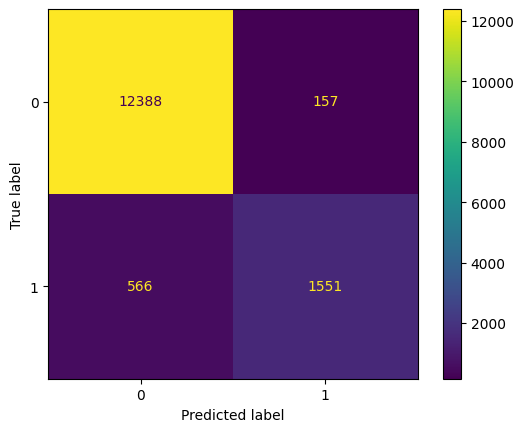

In [29]:
ConfusionMatrixDisplay.from_estimator(final_model,xtest,ytest)

In [30]:
print(classification_report(ytest,final_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12545
           1       0.91      0.73      0.81      2117

    accuracy                           0.95     14662
   macro avg       0.93      0.86      0.89     14662
weighted avg       0.95      0.95      0.95     14662



## Using this model for final predictions

In [31]:
path2 = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/test_loan.csv'
xnew = pd.read_csv(path2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [34]:
xnew_pre = pre.transform(xnew)

In [35]:
xnew_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108


In [36]:
loan_status_predicted = final_model.predict(xnew_pre)
loan_status_predicted[:5]

array([1, 0, 1, 0, 0])

In [37]:
xnew['Loan Status Predicted'] = loan_status_predicted
xnew.to_csv('Predicted Loan Results.csv',index=False)